## Excercises on ice sheet modeling at GIA training school 2023
© Torsten Albrecht, albrecht@pik-potsdam.de, PIK, 2023

- based on the book [minimal glacier model](https://webspace.science.uu.nl/~oerle102/MM2011-all.pdf) by Hans Oerlemans, 2008

### 1 Minimal glacier model

Cleo and Robin are on field work in North America mapping moraines, indicating there must have been a huge ice-sheet in the past, extending about $1000\text{km}$.

In order ti understand possible GIA effects they need an estimate of the past ice sheet thickness distribution.

Assuming "perfect plasticity" the stress in the ice cannot exceed the yield stress $\tau_0$, and basal drag must be equal to $\tau_0$. Hence, driving stress equals yield stress

$$
\rho_i g H \left|\frac{\partial h}{\partial x}\right| = \tau_0 .
$$


#### Q1: What would be the maximum thickness of an (1-D) ice sheet of length $L$ resting on a flat bed? 

Hint: $\tau_0 = 50 \text{k Pa}$, $L=1000\text{km}$ and $\frac{\partial h}{\partial x} = \frac{\partial H}{\partial x}$ for $\frac{\partial b}{\partial x} = 0$

<div class="alert alert-block alert-info">
<details>
  <summary><b>A1:</b> click to show solution</summary>
    
Let's consider the part for $dh /dx > 0$ from $x=0$ to the summit at $x=L/2$ 

$$
\frac{d(H^2)}{dx} = \frac{2 \tau_0}{\rho_i g}
$$

and integrate from $0$ to $x$

$$
H(0)^2 - H(x)^2 = \frac{2 \tau_0}{\rho_i g} (x)
$$

with $H(0) = H(L) = 0$ we find
$$
H(x) = \sqrt{\frac{2 \tau_0}{\rho_i g} (x)}, \;0 \leq x \leq L/2
$$

and 

$$
H(x) = \sqrt{\frac{2 \tau_0}{\rho_i g} (L-x)}, \;L/2 \leq x \leq L
$$

and $H(L/2) = \sqrt{\frac{2 \tau_0}{\rho_i g} \frac{L}{2}}$ 

which yields a maximum thickness of $2.4\text{km}$ for $1000\text{km}$.
    
</details>
    </div>

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

import matplotlib.pylab as plt
from matplotlib import cm, colors
import netCDF4 as nc
import numpy as np

Hmax 2379.7 m


(0.0, 1000.0)

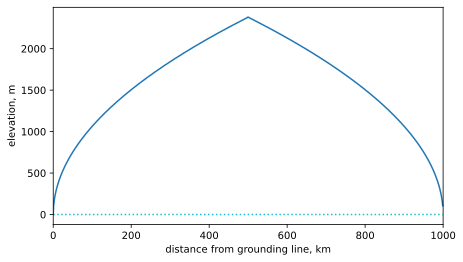

In [2]:
# setting parameters
Lext = 1000e3 #m
tau0 = 50e3 #Pa
g = 9.81 #m/s2
rhoi = 900 #kg/m3 

H_max = (tau0*Lext/(rhoi*g))**0.5
print('Hmax',np.around(H_max,decimals=1),'m')
#print(2*tau0/(rhoi*g))

#ice shelf geometry and spatial resolution
dx = 1.0  # km
xl = np.arange(0, Lext, dx*1e3)  #m
xkm = xl * 1e-3 # xl in km
#print(len(xl))


Hplast_left = (2.0*tau0*xl/(rhoi*g))**0.5
Hplast_right = (2.0*tau0*(Lext-xl)/(rhoi*g))**0.5

#print(Hplast_left)

################################################################
fig = plt.figure(10,figsize=(7,4))
ax1 = fig.add_subplot(1,1,1)

# bottom
ax1.plot(xkm, np.zeros_like(xl), ls='dotted', color='C9')

ax1.plot(xkm[xl<Lext/2.0], Hplast_left[xl<Lext/2.0], color='C0')
ax1.plot(xkm[xl>=Lext/2.0], Hplast_right[xl>=Lext/2.0], color='C0')

# ocean water
#ax.plot(x, lan, color='C1')
#ax1.fill_between(x,-1e3,lan,color='C0')

ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('elevation, m')
ax1.set_xlim(0,Lext*1e-3)


#### Q1*: What would be the maximum surface elevation and subsidence, if the ice sheet load was in equilibrium with the solid Earth underneath?

$$
H = \left(1-\frac{b}{h}\right) h = \left(1-\frac{\rho_i}{\rho_m - \rho_i}\right) h  = \left(1-\zeta\right) h
$$


Hint: Assume a mantle density of $\rho_m = 3300 \text{kg m}^{-3}$

<div class="alert alert-block alert-info">
<details>
  <summary><b>A1*:</b> click to show solution</summary>

$$
H(x) = \sqrt{\frac{2 \tau_0 (1-\zeta)}{\rho_i g} (x)}, \;0 \leq x \leq L/2
$$
 
 
$$
h(x) = \sqrt{\frac{2 \tau_0}{\rho_i g (1-\zeta)} (x)}, \;0 \leq x \leq L/2
$$

The ice sheet becomes thicker with up to 3.0km at the summit, while surface elevation is lower with about 1.9km.
    
</details>
    </div>

0.375
hmax 1881.3 m
Hmax 3010.2 m
bmax -1128.8 m


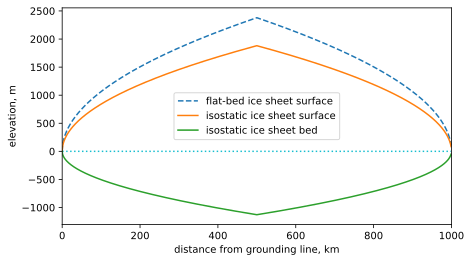

In [3]:
rhom = 3300.0
zeta = rhoi/(rhom-rhoi)
print(zeta)

Hiso_left = (2.0*tau0*xl/(rhoi*g*(1.0-zeta)))**0.5
Hiso_right = (2.0*tau0*(Lext-xl)/(rhoi*g*(1.0-zeta)))**0.5

hiso_left = (2.0*tau0*xl*(1.0-zeta)/(rhoi*g))**0.5
hiso_right = (2.0*tau0*(Lext-xl)*(1.0-zeta)/(rhoi*g))**0.5

Hiso_max = (tau0*Lext/(rhoi*g*(1.0-zeta)))**0.5
hiso_max = (tau0*Lext*(1.0-zeta)/(rhoi*g))**0.5

print('hmax',np.around(hiso_max,decimals=1),'m')
print('Hmax',np.around(Hiso_max,decimals=1),'m')
print('bmax',np.around(hiso_max-Hiso_max,decimals=1),'m')

################################################################
fig = plt.figure(10,figsize=(7,4))
ax1 = fig.add_subplot(1,1,1)

# bottom
ax1.plot(xkm, np.zeros_like(xl), ls='dotted', color='C9')

Hplast = np.r_[Hplast_left[xl<Lext/2.0], Hplast_right[xl>=Lext/2.0]]
ax1.plot(xkm, Hplast, color='C0',ls='dashed',label='flat-bed ice sheet surface')

hiso = np.r_[hiso_left[xl<Lext/2.0], hiso_right[xl>=Lext/2.0]]
ax1.plot(xkm, hiso, color='C1',label='isostatic ice sheet surface')

biso = np.r_[hiso_left[xl<Lext/2.0]-Hiso_left[xl<Lext/2.0], hiso_right[xl>=Lext/2.0]-Hiso_right[xl>=Lext/2.0]]
ax1.plot(xkm, biso, color='C2',label='isostatic ice sheet bed')

ax1.set_xlabel('distance from grounding line, km')
ax1.set_ylabel('elevation, m')
ax1.set_xlim(0,Lext*1e-3)
ax1.legend()